In [10]:
import pandas as pd 
import numpy as np
import plotly.express as px

train = pd.read_csv('/Users/lucasgoh/Library/CloudStorage/GoogleDrive-zwg210@nyu.edu/My Drive/2-Semesters-based Folders/0-Fall 2023/15-072_Analytics-Edge/edge-project-2023/1-data/train.csv')
train = train[train["date_id"] >= 451]
train.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
4907980,0,451,0,1.016637e+08,-1,1.001570,27901114.55,NaN,NaN,0.999892,56601.00,1.000060,31225.16,1.0,12.749434,24805,451_0_0
4907981,1,451,0,1.481195e+06,1,0.999733,2922825.96,NaN,NaN,0.999782,20602.00,1.000218,20611.00,1.0,-0.090003,24805,451_0_1
4907982,2,451,0,0.000000e+00,0,0.999531,7211807.46,NaN,NaN,0.999480,19685.00,1.000546,20691.30,1.0,5.480051,24805,451_0_2
4907983,3,451,0,5.426093e+06,-1,1.000054,52742546.23,NaN,NaN,0.999902,10059.75,1.000104,10653.66,1.0,-3.870130,24805,451_0_3
4907984,4,451,0,6.102518e+06,-1,1.000013,10336604.95,NaN,NaN,0.998472,5346.00,1.000153,535.50,1.0,2.980232,24805,451_0_4


<Axes: title={'center': 'Stock 0 on Day 0 - How the order book pricing changes during the auction'}, xlabel='seconds_in_bucket'>

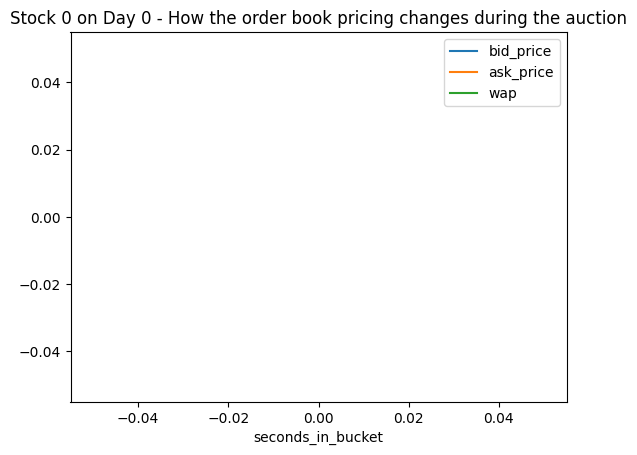

In [11]:
(
    train
    .query('stock_id ==0 & date_id ==0')
    [['seconds_in_bucket','bid_price','ask_price', 'wap']]
    .replace(0, np.nan)
    .set_index('seconds_in_bucket')
    .plot(title='Stock 0 on Day 0 - How the order book pricing changes during the auction')
)

<Axes: title={'center': 'Stock 0 on Day 0 - How the auction & combined book pricing changes during the auction'}, xlabel='seconds_in_bucket'>

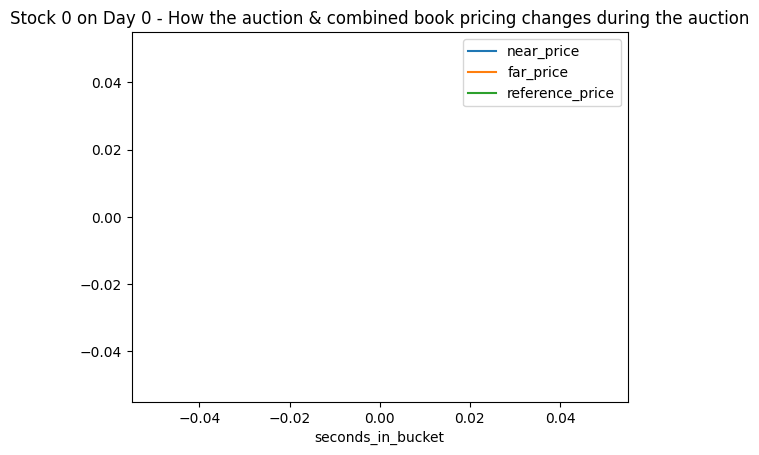

In [12]:
(
    train
    .query('stock_id ==0 & date_id ==0')
    [['seconds_in_bucket','near_price','far_price','reference_price']]
    .replace(0, np.nan)
    .set_index('seconds_in_bucket')
    .plot(title = 'Stock 0 on Day 0 - How the auction & combined book pricing changes during the auction')
)


<Axes: title={'center': 'Stock 0 on Day 0 - How the auction sizing changes during the auction period'}, xlabel='seconds_in_bucket'>

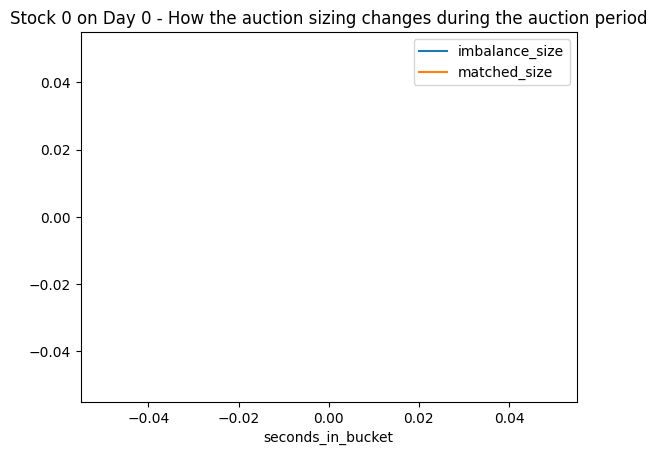

In [13]:
(
    train
    .query('stock_id ==0 & date_id ==0')
    [['seconds_in_bucket','imbalance_size','matched_size']]
    .set_index('seconds_in_bucket')
    .plot(title='Stock 0 on Day 0 - How the auction sizing changes during the auction period')
)

## Baseline Solutions

A simple baseline is to assume we have no valuable information about the direction any stock moves, which translates to a predicted value of 0 for all observations. This baseline is quite hard to beat in the context of financial markets.

However, we have some information in our dataset that should help us to beat this baseline. If we observe an auction imbalance, it indicates that at the current price there is buying or selling interest that will currently not get matched in the auction. We can therefore adjust our prediction upwards if there is a buy imbalance & downwards if there is a sell imbalance.

In [14]:
simple_mapping = {
    1: 0.1,
    0: 0,
    -1: -0.1
}

train['simple_baseline'] = train['imbalance_buy_sell_flag'].map(simple_mapping)

In [15]:
simple_baseline_mae = (train['simple_baseline'] - train['target']).abs().mean()

print("Baseline model MAE:", simple_baseline_mae)

Baseline model MAE: 5.936584233799145


The first model, named baseline_prediction, assumes that we have no valuable information about the direction in which a stock will move. Therefore, it naively predicts a value of 0 for all observations.

The second model, named simple_prediction, uses the information about auction imbalances from a column imbalance_buy_sell_flag. This column likely contains values indicating buy or sell imbalances, which the model translates into upward or downward price movement predictions, respectively, using the simple_mapping dictionary:

A 1 in imbalance_buy_sell_flag would indicate a buy imbalance, and the model predicts a 0.1 increase.
A 0 indicates no imbalance, and the model predicts no change (0).
A -1 indicates a sell imbalance, and the model predicts a 0.1 decrease.